# Electron Spin Resonance Experiment

## Introduction
Thus, the objectives of the experiment are:
- Observation of the resonance curve of DPPH.
- Determination of the resonance frequency as a function of the magnetic field.
- Determination of the g-factor of the free electron.

## Principles
Electron spin resonance (ESR), also known as Electron Paramagnetic Resonance (EPR), is based on the absorption of energy by substances with unpaired electrons when they are subjected to an external continuous magnetic field.

Energy is extracted from a high-frequency alternating magnetic field that is radiated into the sample chamber, perpendicular to the continuous magnetic field.

If the frequency of the alternating field matches the resonance frequency of the sample, the impedance of the transmitting coil filled with the substance making up the sample resonantly changes, and a deviation can be observed on the oscilloscope.

The origin of this resonant absorption is the "flipping" of the direction of the free electron's magnetic moment. The resonance frequency depends on the intensity of the continuous magnetic field; the width of the resonance signal depends on its homogeneity.

The electron magnetic moment with pure spin magnetism assumes discrete states in the magnetic field B:
E_m = -g_J · μ_B · m · B, where m = -1/2, 1/2

Where μ_B = 9.274 × 10⁻²⁴ J/T is the Bohr Magneton and g_J = 2.0023 is the Landé factor.

The Landé factor, represented as g, is a physical constant that describes the relationship between the magnetic moment of a particle and its angular momentum in a magnetic field.

In quantum mechanics, it is commonly used to describe the behavior of particles with spin, such as electrons, protons, or neutrons, in the presence of an external magnetic field.

The Landé factor is calculated using the formula:
g = [J(J + 1) + S(S + 1) - L(L + 1)] / [2J(J + 1)]

Where J is the total angular momentum, S is the total spin, and L is the orbital angular momentum.

However, the Landé factor can also be calculated using the frequency f and the magnetic field B:
B = 3.47 mT/V · U_R
f = (g_J · μ_B / h) · B

# Experimental Procedure

1. Adjust the control console to the lowest frequency at which a defined resonance absorption signal can be observed (approximately 37 MHz).

2. Adjust the sensitivity selector "SENSITIVITY" so that the signal height is maximized. With the optimal adjustment, a faint LED flicker is observed. If the LED lights up brightly, the signal is saturated.

3. Read the resonance coil voltage UR using the PC oscilloscope cursor (Figures 3 and 4). To do this:
   - Open the "Cursor" option from the main menu
   - Under "Channel:" select the voltage option and choose channel "CH2"
   - Use the first cursor (Y1) for reading
   - Set the second cursor (Y2) to 0.000 mV (this defines the zero position of channels CH1 and CH2)

4. Repeat the measurement with different frequencies, ranging from 40 MHz to 70 MHz, in 5 MHz increments. In each case, record in Table 1:
   - The adjusted frequency
   - The measured voltages in the resonance coil

5. **Note:** For frequencies higher than 45 MHz, change the voltage scale division of channel CH1 from 1 V/div to 500 mV/div.

  Frequency (Hz)    UR    Magnetic Field B (T)    g-factor
----------------  ----  ----------------------  ----------
        40000000  0.50                0.000173      16.472
        45000000  0.72                0.000250      12.869
        50000000  1.26                0.000437       8.171
        55000000  1.70                0.000590       6.661
        60000000  2.18                0.000756       5.667
        65000000  2.64                0.000916       5.069
        70000000  3.04                0.001055       4.741

Slope (a) = 3.2429e+10 Hz/T
Calculated g-factor from slope: 2.3170


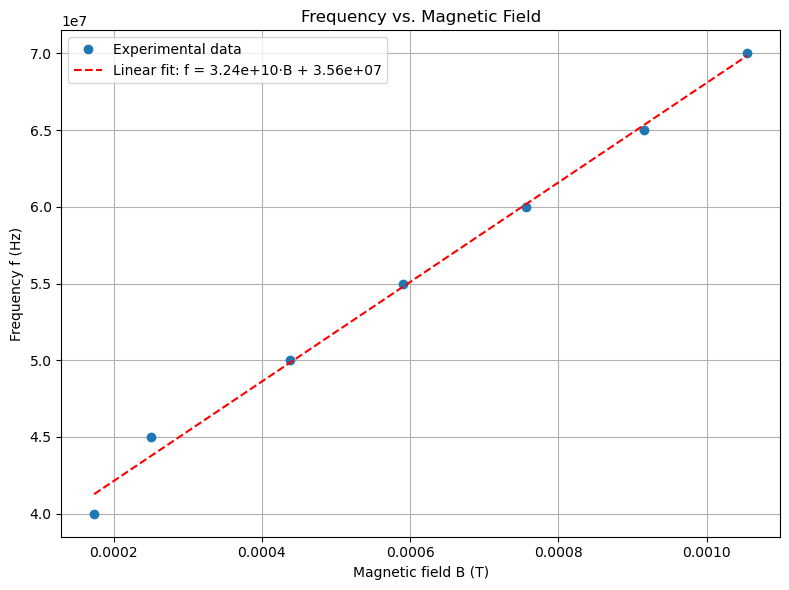

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

# Physical constants
mu_B = 9.274e-24  # Bohr magneton in J/T
h = 6.626e-34  # Planck constant in J-s
k = 3.47e-4  # Conversion factor from UR to B

# Function to calculate B from UR
def calculate_B(UR):
    return k * UR

# Function to calculate the g-factor from f and B
def calculate_g(frequency_hz, B):
    return (frequency_hz * h) / (mu_B * B)

# Data
frequencies_mhz = [40, 45, 50, 55, 60, 65, 70]
frequencies_hz = [f * 1e6 for f in frequencies_mhz]  # CORRECCIÓN: MHz a Hz
UR = [0.5, 0.72, 1.26, 1.7, 2.18, 2.64, 3.04]

# Definir los headers para la tabla
headers = ["Frequency (Hz)", "UR", "Magnetic Field B (T)", "g-factor"]

# Results table
data_table = []

for i in range(len(frequencies_hz)):
    f_hz = frequencies_hz[i]
    ur = UR[i]
    B = calculate_B(ur)
    g = calculate_g(f_hz, B)
    data_table.append([f_hz, ur, B, g])

# Display table
print(tabulate(data_table, headers=headers, floatfmt=[".0f", ".2f", ".6f", ".3f"]))

B_list = [calculate_B(ur) for ur in UR]
g_list = [calculate_g(f, B) for f, B in zip(frequencies_hz, B_list)]

# Linear fit: f = a * B + b
coefficients = np.polyfit(B_list, frequencies_hz, deg=1)
a, b = coefficients

# Calculate g from the slope
g_calculated = (h * a) / mu_B
print(f"\nSlope (a) = {a:.4e} Hz/T")
print(f"Calculated g-factor from slope: {g_calculated:.4f}")

# Create points for the fitted line
B_fit = np.linspace(min(B_list), max(B_list), 100)
f_fit = a * B_fit + b

# Plot
plt.figure(figsize=(8, 6))
plt.plot(B_list, frequencies_hz, 'o', label='Experimental data')
plt.plot(B_fit, f_fit, 'r--', label=f'Linear fit: f = {a:.2e}·B + {b:.2e}')
plt.xlabel('Magnetic field B (T)')
plt.ylabel('Frequency f (Hz)')
plt.title('Frequency vs. Magnetic Field')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
